## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import seaborn as sns

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = Path("../Challange_03/Resources/bitstamp.csv")
bitstamp_df = pd.read_csv(bitstamp, 
             index_col="Timestamp", 
             parse_dates=True, 
             infer_datetime_format=True)



### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = Path("../Challange_03/Resources/coinbase.csv")
coinbase_df = pd.read_csv(coinbase, 
             index_col="Timestamp", 
             parse_dates=True, 
             infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df['Close'] = bitstamp_df['Close'].str.replace('$', '', regex=True)
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp_df['Close'] = bitstamp_df['Close'].astype(float)
bitstamp_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp_df = bitstamp_df.drop_duplicates()
bitstamp_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
coinbase_df.dropna()
#coinbase_df['Close'] = pd.to_numeric(coinbase_df['Close'])

coinbase_df['Close'] = coinbase_df['Close'].str.replace('$', '', regex=True)
coinbase_df.head()

coinbase_df['Close'] = coinbase_df['Close'].astype(float)


coinbase_df = coinbase_df.drop_duplicates()
coinbase_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:,['Close']]


# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.loc[:,['Close']]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_df.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_df.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


Text(0, 0.5, 'Price')

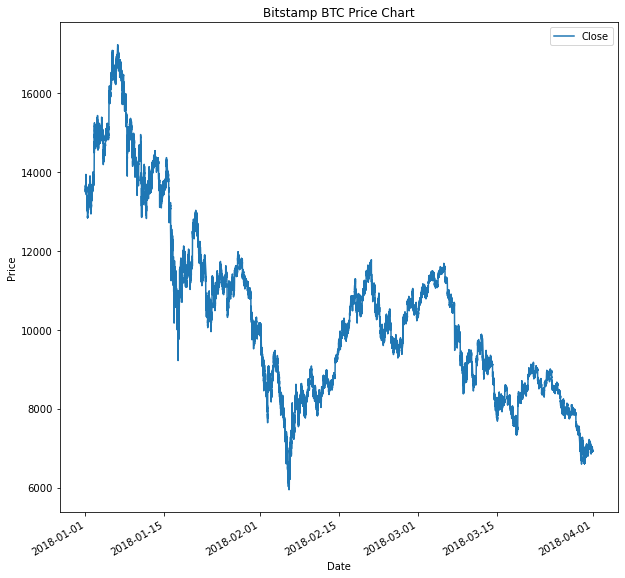

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
ax = bitstamp_sliced.plot(title = "Bitstamp BTC Price Chart", figsize=(10,10))
ax.set_xlabel("Date")
ax.set_ylabel("Price")

Text(0, 0.5, 'Price')

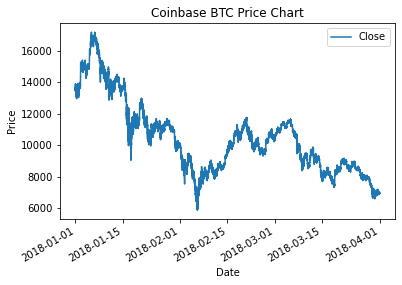

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

cx = coinbase_sliced.plot(title = "Coinbase BTC Price Chart")
cx.set_xlabel("Date")
cx.set_ylabel("Price")

Text(0, 0.5, 'Price')

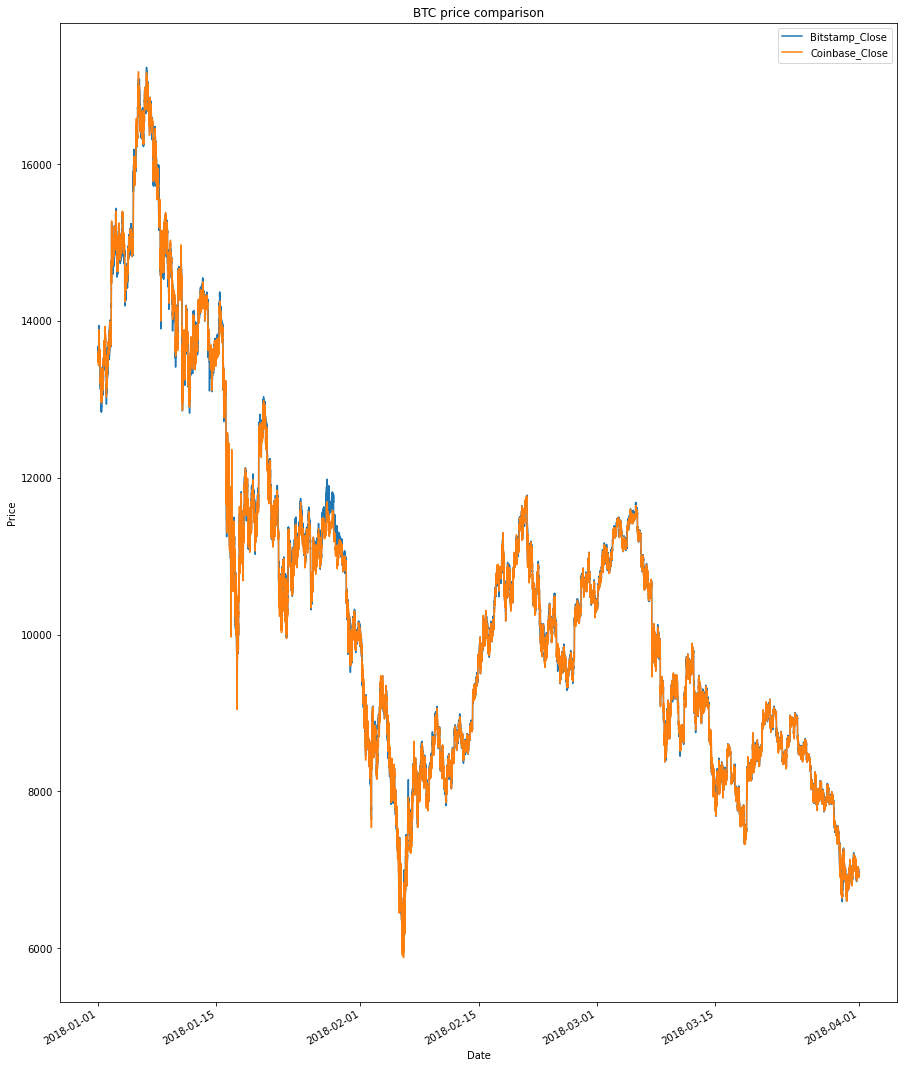

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
combined_df = pd.concat([bitstamp_sliced, coinbase_sliced], axis="columns", join="inner")
combined_df.sort_index()
combined_df.columns = ["Bitstamp_Close", "Coinbase_Close"]
combined_df.head()
dx = combined_df.plot(figsize = (15,20), title='BTC price comparison')
dx.set_xlabel("Date")
dx.set_ylabel("Price")

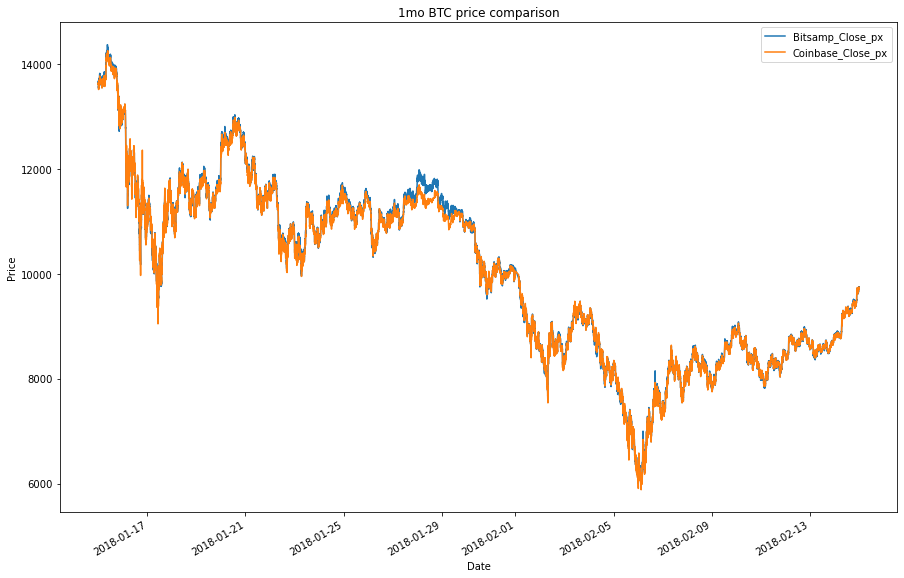

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ex = combined_df.loc['2018-01-15':'2018-02-14'].plot(figsize = (15,10), title='1mo BTC price comparison')
ex.set_xlabel("Date")
ex.set_ylabel("Price")
ex.legend(['Bitsamp_Close_px','Coinbase_Close_px'])

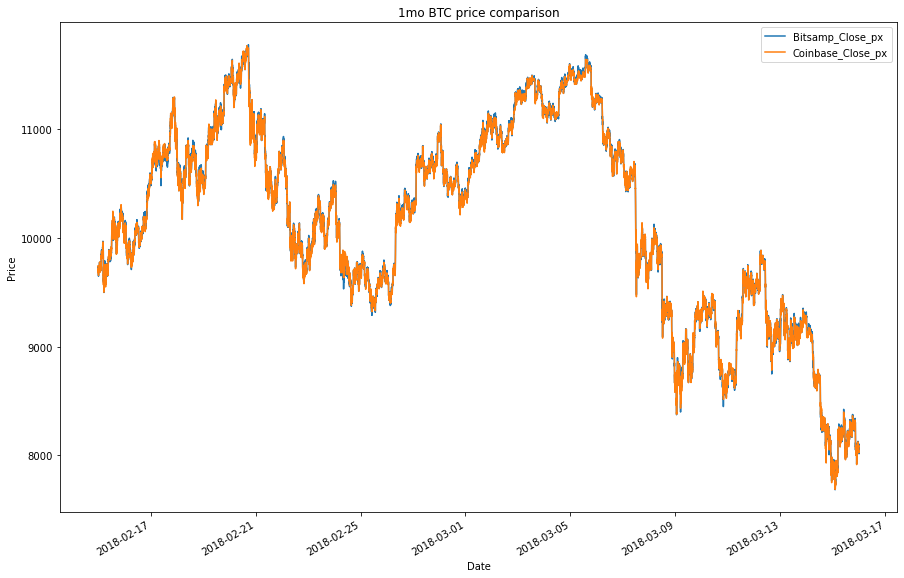

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
fx = combined_df.loc['2018-02-15':'2018-03-15'].plot(figsize = (15,10), title='1mo BTC price comparison')
fx.set_xlabel("Date")
fx.set_ylabel("Price")
fx.legend(['Bitsamp_Close_px','Coinbase_Close_px'])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes - Later the Closing price spread between Bitstamp and Coinbase for Bitcoin went down - potentially as traders started to arbitrage trade BTC on these two exchanges - flatening the spread

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

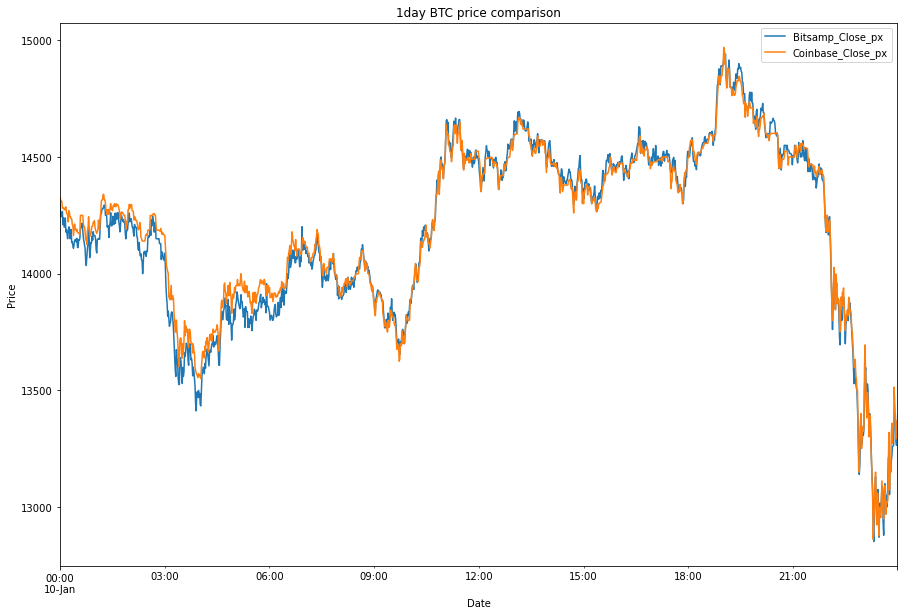

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
gx = combined_df.loc['2018-01-10'].plot(figsize = (15,10), title='1day BTC price comparison')
gx.set_xlabel("Date")
gx.set_ylabel("Price")
gx.legend(['Bitsamp_Close_px','Coinbase_Close_px'])

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#combined_df['px_diff'] = combined_df['Bitstamp_Close'] - combined_df['Coinbase_Close']
#early_df = pd.DataFrame(combined_df.loc['2018-01-10'])
arbitrage_spread_early = pd.DataFrame(combined_df.loc['2018-01-10'])
#pd.DataFrame(early_df['Bitstamp_Close'] - early_df['Coinbase_Close'])
arbitrage_spread_early['early_spread'] = arbitrage_spread_early['Coinbase_Close'] - arbitrage_spread_early['Bitstamp_Close']


# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Bitstamp_Close,Coinbase_Close,early_spread
count,1440.000000,1440.000000,1440.000000
mean,14185.738681,14201.717507,15.978826
std,395.437481,374.483584,45.869721
min,12852.730000,12862.010000,-78.810000
25%,13900.022500,13948.500000,-17.787500
50%,14219.085000,14264.670000,6.880000
75%,14499.990000,14489.967500,46.530000
max,14955.000000,14970.000000,192.000000


<AxesSubplot:>

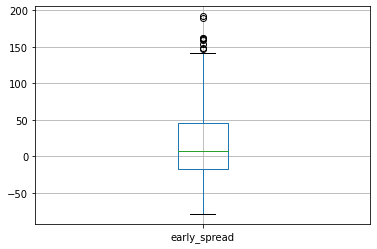

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.boxplot('early_spread')

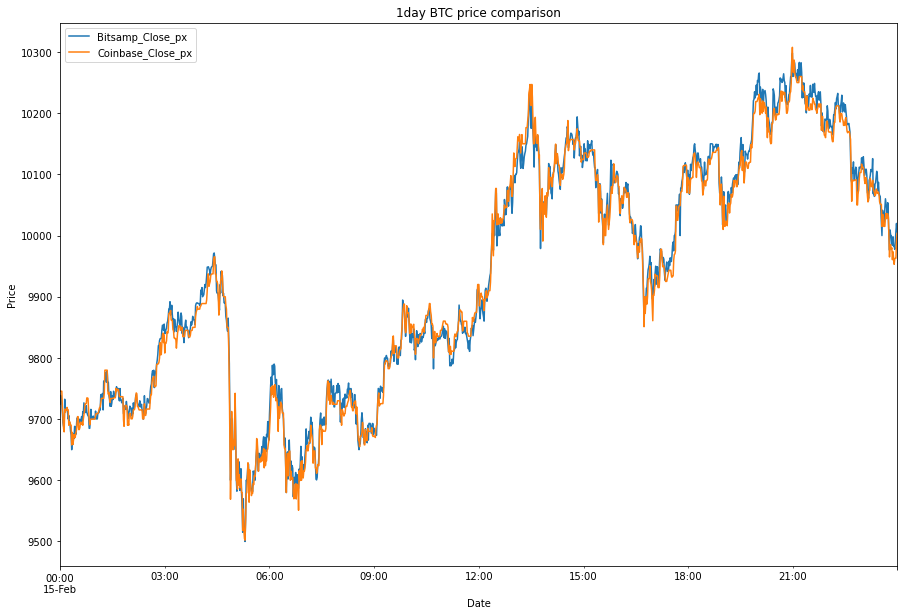

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
hx = combined_df.loc['2018-02-15'].plot(figsize = (15,10), title='1day BTC price comparison')
hx.set_xlabel("Date")
hx.set_ylabel("Price")
hx.legend(['Bitsamp_Close_px','Coinbase_Close_px'])

In [24]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#middle_df = pd.DataFrame(combined_df.loc['2018-02-15'])
arbitrage_spread_middle = pd.DataFrame(combined_df.loc['2018-02-15'])
#pd.DataFrame(middle_df['Bitstamp_Close'] - middle_df['Coinbase_Close'])
arbitrage_spread_middle['middle_spread'] = arbitrage_spread_middle['Coinbase_Close'] - arbitrage_spread_middle['Bitstamp_Close']

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Bitstamp_Close,Coinbase_Close,middle_spread
count,1440.000000,1440.000000,1440.000000
mean,9930.236535,9924.476528,-5.760007
std,196.232293,195.447618,14.908671
min,9500.000000,9502.100000,-55.470000
25%,9743.000000,9734.010000,-16.217500
50%,9914.490000,9909.945000,-6.960000
75%,10107.452500,10098.247500,3.995000
max,10298.000000,10307.680000,48.800000


<AxesSubplot:>

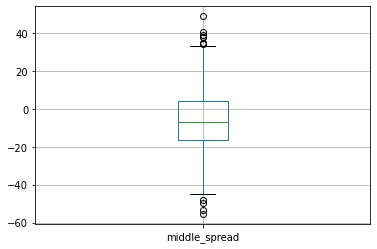

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.boxplot('middle_spread')

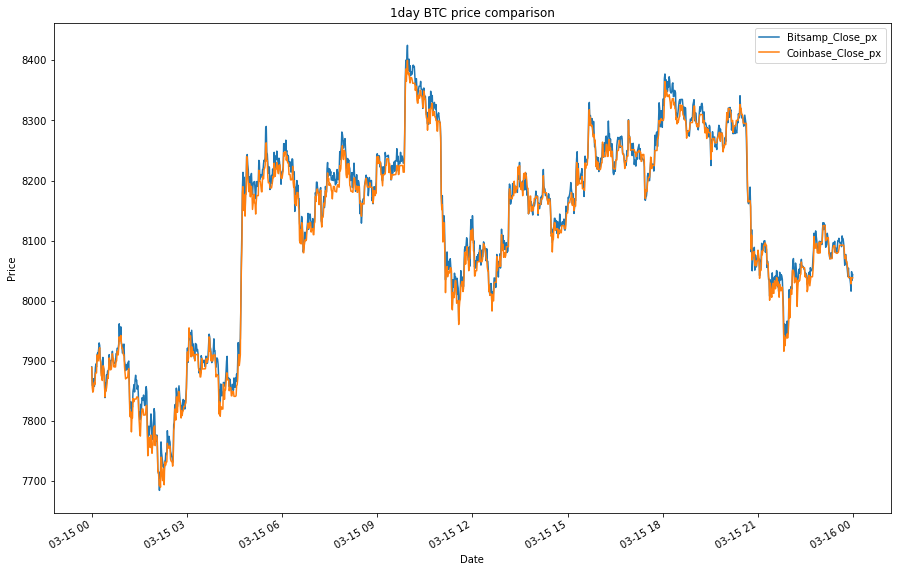

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ix = combined_df.loc['2018-03-15'].plot(figsize = (15,10), title='1day BTC price comparison')
ix.set_xlabel("Date")
ix.set_ylabel("Price")
ix.legend(['Bitsamp_Close_px','Coinbase_Close_px'])

In [27]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#late_df = pd.DataFrame(combined_df.loc['2018-03-15'])
arbitrage_spread_late = pd.DataFrame(combined_df.loc['2018-03-15'])
#pd.DataFrame(late_df['Bitstamp_Close'] - late_df['Coinbase_Close'])
arbitrage_spread_late['late_spread']= arbitrage_spread_late['Coinbase_Close'] - arbitrage_spread_late['Bitstamp_Close']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Bitstamp_Close,Coinbase_Close,late_spread
count,1437.000000,1437.000000,1437.00000
mean,8123.178803,8114.413083,-8.76572
std,159.647741,160.684345,10.74975
min,7684.690000,7690.000000,-48.98000
25%,8037.800000,8030.010000,-15.74000
50%,8168.420000,8163.300000,-8.74000
75%,8238.850000,8232.360000,-1.74000
max,8425.000000,8400.000000,24.71000


<AxesSubplot:>

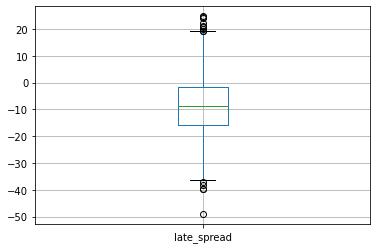

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.boxplot('late_spread')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [52]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_early = arbitrage_spread_early
arbitrage_spread_middle = arbitrage_spread_middle
arbitrage_spread_late = arbitrage_spread_late


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[(arbitrage_spread_early.early_spread>0)].describe()
arbitrage_spread_middle[(arbitrage_spread_middle.middle_spread>0)].describe()
arbitrage_spread_late[(arbitrage_spread_late.late_spread>0)].describe()

    



,Bitstamp_Close,Coinbase_Close,late_spread,returns
count,284.000000,284.000000,284.000000,284.000000
mean,8144.020423,8150.221514,6.201092,0.000760
std,127.684203,128.467872,5.225967,0.000638
min,7684.690000,7692.750000,0.010000,0.000001
25%,8069.652500,8074.900000,2.247500,0.000273
50%,8171.360000,8179.250000,4.830000,0.000589
75%,8235.880000,8244.367500,9.002500,0.001099
max,8341.890000,8345.000000,24.710000,0.003004


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [42]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= pd.DataFrame(arbitrage_spread_early)
spread_return_early['returns'] = spread_return_early['early_spread'] / spread_return_early[['Bitstamp_Close', 'Coinbase_Close']].min(axis=1)
spread_return_middle= pd.DataFrame(arbitrage_spread_middle)
spread_return_middle['returns'] = spread_return_middle['middle_spread'] / spread_return_middle[['Bitstamp_Close', 'Coinbase_Close']].min(axis=1)
spread_return_late= pd.DataFrame(arbitrage_spread_late)
spread_return_late['returns'] = spread_return_late['late_spread'] / spread_return_late[['Bitstamp_Close', 'Coinbase_Close']].min(axis=1)

spread_return_early = spread_return_early[(spread_return_early > 0).all(axis=1)]
spread_return_middle = spread_return_middle[(spread_return_middle > 0).all(axis=1)]
spread_return_late = spread_return_late[(spread_return_late > 0).all(axis=1)]

# Review the spread return DataFrame
spread_return_early
spread_return_middle
spread_return_late

,Bitstamp_Close,Coinbase_Close,late_spread,returns
Timestamp,,,,
2018-03-15 00:04:00,7860.81,7860.84,0.03,0.000004
2018-03-15 00:05:00,7857.80,7864.29,6.49,0.000826
2018-03-15 00:22:00,7888.96,7891.73,2.77,0.000351
2018-03-15 00:23:00,7885.38,7886.18,0.80,0.000101
2018-03-15 00:25:00,7838.96,7840.00,1.04,0.000133
...,...,...,...,...
2018-03-15 23:52:00,8038.70,8038.80,0.10,0.000012
2018-03-15 23:54:00,8036.21,8038.80,2.59,0.000322
2018-03-15 23:55:00,8028.18,8038.81,10.63,0.001324


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [55]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = pd.DataFrame(spread_return_early[(spread_return_early > 0.01).all(axis=1)])
profitable_trades_early
profitable_trades_middle = pd.DataFrame(spread_return_middle[(spread_return_middle > 0.01).all(axis=1)])
profitable_trades_middle
profitable_trades_late = pd.DataFrame(spread_return_late[(spread_return_late > 0.01).all(axis=1)])
profitable_trades_late

# Review the first five profitable trades
profitable_trades_early.head()
profitable_trades_middle.head()
profitable_trades_late.head()

,Bitstamp_Close,Coinbase_Close,late_spread,returns
Timestamp,,,,


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [56]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

,Bitstamp_Close,Coinbase_Close,early_spread,returns
count,14.000000,14.000000,14.000000,14.000000
mean,13671.147857,13826.619286,155.471429,0.011375
std,211.175708,211.917715,17.641360,0.001300
min,13218.080000,13359.430000,137.130000,0.010001
25%,13566.750000,13750.000000,141.095000,0.010540
50%,13715.935000,13858.950000,151.490000,0.010963
75%,13814.035000,13985.257500,162.372500,0.011913
max,14000.000000,14140.010000,192.000000,0.014012


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [60]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = pd.DataFrame(profitable_trades_early)
profit_early['profit'] = profit_early['returns'] * profit_early[['Bitstamp_Close', 'Coinbase_Close']].min(axis=1)
profit_early

profit_middle = pd.DataFrame(profitable_trades_middle)
profit_middle['profit'] = profit_middle['returns'] * profit_middle[['Bitstamp_Close', 'Coinbase_Close']].min(axis=1)
profit_middle

profit_late = pd.DataFrame(profitable_trades_late)
profit_late['profit'] = profit_late['returns'] * profit_late[['Bitstamp_Close', 'Coinbase_Close']].min(axis=1)
profit_late

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_late
profit_middle

profit_early

,Bitstamp_Close,Coinbase_Close,early_spread,returns,profit
Timestamp,,,,,
2018-01-10 02:22:00,14000.00,14140.01,140.01,0.010001,140.01
2018-01-10 03:04:00,13872.31,14021.01,148.70,0.010719,148.70
2018-01-10 03:05:00,13818.00,14010.00,192.00,0.013895,192.00
2018-01-10 03:06:00,13839.51,14000.00,160.49,0.011597,160.49
2018-01-10 03:17:00,13640.90,13800.00,159.10,0.011663,159.10
2018-01-10 03:18:00,13587.00,13750.00,163.00,0.011997,163.00
2018-01-10 03:19:00,13560.00,13750.00,190.00,0.014012,190.00
2018-01-10 03:34:00,13661.86,13798.99,137.13,0.010037,137.13
2018-01-10 03:53:00,13444.00,13585.01,141.01,0.010489,141.01


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [61]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_middle.describe()
profit_late.describe()
profit_early.describe()

,Bitstamp_Close,Coinbase_Close,early_spread,returns,profit
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,13671.147857,13826.619286,155.471429,0.011375,155.471429
std,211.175708,211.917715,17.641360,0.001300,17.641360
min,13218.080000,13359.430000,137.130000,0.010001,137.130000
25%,13566.750000,13750.000000,141.095000,0.010540,141.095000
50%,13715.935000,13858.950000,151.490000,0.010963,151.490000
75%,13814.035000,13985.257500,162.372500,0.011913,162.372500
max,14000.000000,14140.010000,192.000000,0.014012,192.000000


Text(0, 0.5, 'Profit')

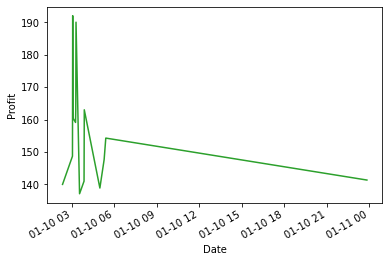

In [68]:
# Plot the results for the early profit per trade DataFrame
zx = profit_middle[('profit')].plot()
yx = profit_late[('profit')].plot()
mx = profit_early[('profit')].plot()
mx.set_xlabel("Date")
mx.set_ylabel("Profit")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [73]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
total_profit_late = profit_per_trade_late['profit'].sum()
total_profit_late
total_profit_middle = profit_per_trade_middle['profit'].sum()
total_profit_middle
total_profit_early = profit_per_trade_early['profit'].sum()
total_profit_early

2176.600000000002

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [75]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early['profit'].cumsum()
cumulative_profit_early

Timestamp
2018-01-10 02:22:00     140.01
2018-01-10 03:04:00     288.71
2018-01-10 03:05:00     480.71
2018-01-10 03:06:00     641.20
2018-01-10 03:17:00     800.30
2018-01-10 03:18:00     963.30
2018-01-10 03:19:00    1153.30
2018-01-10 03:34:00    1290.43
2018-01-10 03:53:00    1431.44
2018-01-10 03:54:00    1594.44
2018-01-10 05:00:00    1733.33
2018-01-10 05:18:00    1880.97
2018-01-10 05:25:00    2035.25
2018-01-10 23:50:00    2176.60
Name: profit, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

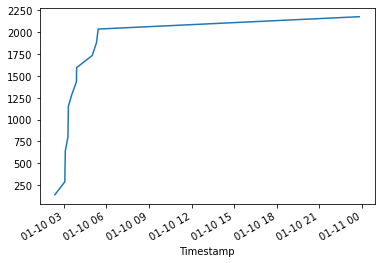

In [76]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The arbitrage trade is usually profitable 'early' in each day and 'early' within any given period as traders quickly arbitrage away any spread between different exchanged. As a result, the spread usallyflattens over time regardless of time frame - making the markets more efficient.